<a href="https://www.kaggle.com/code/brmil07/food-industry-stock-price-forecasting?scriptVersionId=162446759" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Food Industry Stock Price Forecasting 🏭**
---

# **Preparation Phase 🧺**
---

## **Import the Library 📚**
---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indf-stock-price/Stock_Price_INDF.JK_2001-2023.csv


In [2]:
import matplotlib.pyplot as plt

## **Load the Data 📔**
---

In [3]:
df = pd.read_csv('/kaggle/input/indf-stock-price/Stock_Price_INDF.JK_2001-2023.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5745 entries, 0 to 5744
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5745 non-null   object 
 1   Open       5743 non-null   float64
 2   High       5743 non-null   float64
 3   Low        5743 non-null   float64
 4   Close      5743 non-null   float64
 5   Adj Close  5743 non-null   float64
 6   Volume     5743 non-null   float64
dtypes: float64(6), object(1)
memory usage: 314.3+ KB


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-01,775.0,775.0,775.0,775.0,407.255463,0.0
1,2001-01-02,775.0,800.0,775.0,800.0,420.392609,5711000.0
2,2001-01-03,775.0,800.0,775.0,800.0,420.392609,6436500.0
3,2001-01-04,775.0,800.0,775.0,800.0,420.392609,8533500.0
4,2001-01-05,800.0,825.0,775.0,800.0,420.392609,20578000.0


In [6]:
# Check for missing values
df.isna().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [7]:
# Locate NaN values in the 'Price' column
nan_rows = df[df['Volume'].isna()]
print(nan_rows)

            Date  Open  High  Low  Close  Adj Close  Volume
1983  2008-10-13   NaN   NaN  NaN    NaN        NaN     NaN
4634  2019-06-19   NaN   NaN  NaN    NaN        NaN     NaN


In [8]:
# Drop rows with any null values
df.dropna(inplace=True)

In [9]:
nan_rows = df[df['Volume'].isna()]
print(nan_rows)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [10]:
df1 = df[['Date','Adj Close']].copy(deep=True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1.rename(columns={'Adj Close': 'Price'}, inplace=True)
df1 = df1.resample('W').mean()
df1.ffill(inplace=True)

In [11]:
# Check for missing values
df1.isna().sum()

Price    0
dtype: int64

In [12]:
# Check for infinite values
inf_values = df1.isin([np.inf, -np.inf])

# Check if any value is infinite in the DataFrame
if inf_values.any().any():
    print("DataFrame contains infinite values.")
    print("Locations of infinite values:")
    print(inf_values)
else:
    print("DataFrame does not contain infinite values.")

DataFrame does not contain infinite values.


In [13]:
df1[:10].style.background_gradient(cmap='viridis')

,Price
Date,
2001-01-07 00:00:00,417.765180
2001-01-14 00:00:00,420.392609
2001-01-21 00:00:00,425.647504
2001-01-28 00:00:00,441.412225
2001-02-04 00:00:00,491.333826
2001-02-11 00:00:00,551.765271
2001-02-18 00:00:00,530.745630
2001-02-25 00:00:00,530.745630
2001-03-04 00:00:00,491.333844


# **Exploratory Data Analysis 🔍**
---

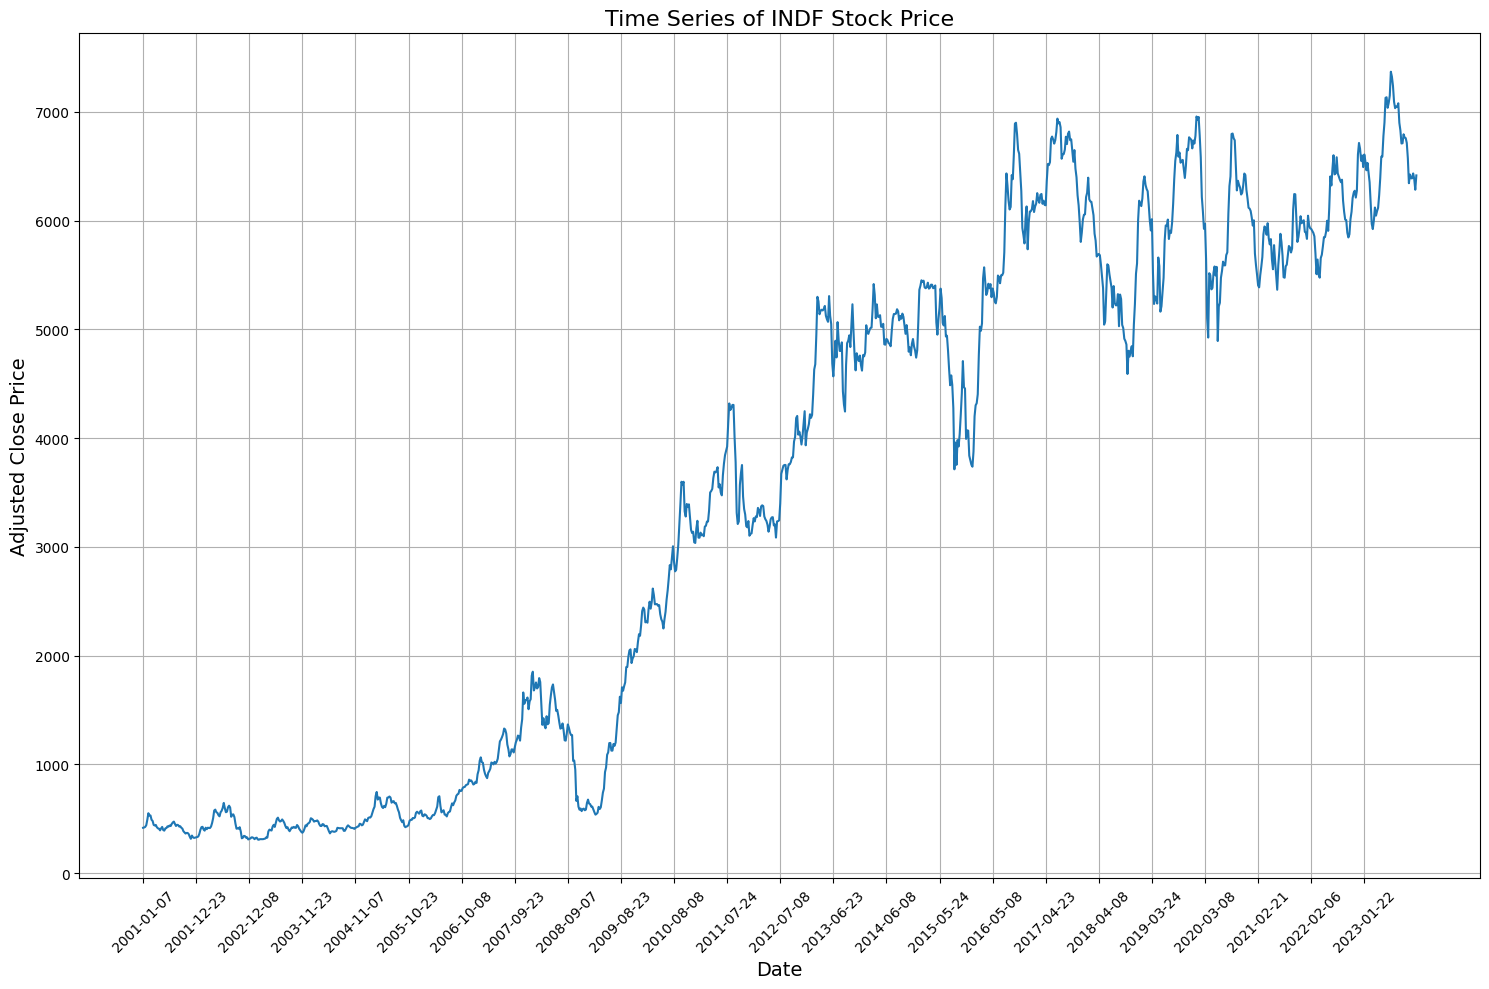

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(df1.index, df1['Price'])

n = 50
plt.xticks(df1.index[::n])
plt.xticks(rotation=45)

plt.title("Time Series of INDF Stock Price", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Adjusted Close Price", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# **References 📃**
---
* [Bank Stock Price Forecasting](https://www.kaggle.com/code/brmil07/bank-stock-price-forecasting)